##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготовка данных:
* [2. Обработка пропусков.](#2-bullet)
* [3. Приведение данных к нужным типам.](#3-bullet)

##### Часть 3. Рассчёт дополнительных параметров:
* [4. Рассчёт цены квадратного метра.](#4-bullet)
* [5. Рассчёт дня недели, месяца и года публикации объявления.](#5-bullet)
* [6. Категоризация этажей квартир.](#6-bullet)
* [7. Рассчёт соотношение жилой и общей площади, а также отношение площади кухни к общей.](#7-bullet)

##### Часть 4. Исследовательский анализ данных:
* [8. Изучение площади, цены, числа комнат, высоты потолков.](#8-bullet)
* [9. Изучение времени продажи квартиры.](#9-bullet)
* [10. Исключение редких и выбивающихся значений.](#10-bullet)
* [11. Определение факторов больше всего влияют на стоимость квартиры.](#11-bullet)
* [12. Определение населённых пунктов с наибольшим числом объявлений.](#12-bullet)
* [13. Изучение предложения квартир.](#13-bullet)
* [14. Изучение сегмента квартир в центре.](#14-bullet)

##### Часть 5. Обший вывод:
* [15. Обший вывод.](#15-bullet)


### Часть 1. Изучение общей информации. 

<a id='1-bullet'></a> 
### 1. Изучение файлов с данными, получение общей информации, загрузка библиотек. 

Для анализа сервисом Яндекс.Недвижимость был предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Прочитаем его и сохраним в переменной *data*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv('./datasets/real_estate_data.csv', '\t')
pd.options.display.max_columns = 100

Получим первые 10 строк таблицы.

In [2]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем общую информацию о данных в таблице *data*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в таблице 22 столбца с разным типоми данных *int*, *float*, *object* и *bool*. 

Информация, содержащаяся в столбцах:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Есть пояснение к данным: *апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания*.

### Вывод

Каждая строка таблицы содержит общую информацию об объекте недвижимости, его основных параметрах геолокации, цене и истории объявления. Название столбцов считаю достаточно качественными и информативными. Есть проблемы с пропусками данных в столбцах:
* ceiling_height (высота потолков)
* floors_total (всего этажей в доме)
* living_area (жилая площадь)
* is_apartment (апартаменты)
* kitchen_area (площадь кухни)
* balcony (число балконов)
* locality_name (название населённого пункта)
* airports_nearest (расстояние до ближайшего аэропорта)
* cityCenters_nearest (расстояние до центра города)
* parks_around3000 (число парков в радиусе 3 км)
* ponds_around3000 (число водоёмов в радиусе 3 км)
* ponds_nearest (расстояние до ближайшего водоёма)
* days_exposition (сколько дней было размещено объявление (от публикации до снятия))

### Часть 2. Подготовка данных.

<a id='2-bullet'></a>
### 2. Обработка пропусков

* #### Рассмотрим пропуски в столбце *ceiling_height (высота потолков)*. 

Так как высота потолков параметр не столь важный при продаже квартиры для общей массы покупателей и достаточно стандартный, то можно заменить пропущенные значения на медиану или среднее значение.

Посмотрим количество пропусков в этом столбце:

In [4]:
data['ceiling_height'].isna().sum()

9195

Пропусков много, их надо чему-то менять. Либо на медиану, либо на среднее, либо на наиболее распространённое значение.

Посмотрим чему равна медиана и среднее значение: 

In [5]:
print('Медиана: {:.2f}'.format(data['ceiling_height'].median()))
print('Среднее: {:.2f}'.format(data['ceiling_height'].mean()))

Медиана: 2.65
Среднее: 2.77


Значения очень близки, но всё же остановимся на медиане.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Проверим наличие пропусков.

In [7]:
print(data['ceiling_height'].isna().sum())

0


* #### Рассмотрим пропуски в столбце *floors_total (всего этажей в доме)*. 

Интересно рассмотреть этот параметр вместе с параметром *floor (этаж)*

In [8]:
display(data[data['floors_total'].isna()]['floor'].head())

186      4
237      1
457     12
671      8
1757     9
Name: floor, dtype: int64

Видно что с номером этажа это никак не связано. Нельзя сказать что если не указана этажность дома, то дом одноэтажный, так же нельзя заполнить пропуски медианой, птому что это мало того что исказит данные, так может ещё оказаться что номер этажа выше чем этажность дома.
Думаю что адекватного заполнения пропусков здесь нет, по этому оставим их. В дальнейшем, при категоризации этажа квартиры, будем считать эти пропуски как квартиры, находящиеся не на последнем этаже.

* #### Рассмотрим пропуски в столбце *is_apartment (апартаменты)*.

Посмотрим сколько апартаментов и не апартаментов с не пропущенными значениями в этом столбце.

In [9]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Не апартаментов явно больше. Посмотрим другие характеристики у апартаментов. Балконы, количество комнат. Выведем 5 строк.

In [10]:
display(data.query('is_apartment == True')[['balcony', 'rooms']].head())

,balcony,rooms
543,NaN,2
916,2.0,2
1109,1.0,2
1608,NaN,1
2759,1.0,3


Какой-то однозначной зависимости не видно. У апартаментов может быть и много комнат и балконы. Привязаться к какому-то параметру для заполнения пропусков не получается, по этому предположим что отсутствие значения это всё-таки False. Так как по валидной статистике количество апартаментов это малая часть от всех объявлений, замена пропусков на False не приведёт к значительному влиянию на дальнейшие расчёты, чем если мы будем наугад заполнять, даже придерживаясь известной пропорции.

In [11]:
print(data.query('is_apartment == True')['is_apartment'].count())
data['is_apartment'] = data['is_apartment'].fillna(False)

50


Проверим результат.

In [12]:
print(data['is_apartment'].isna().sum())
print(data.query('is_apartment')['is_apartment'].count())

0
50


* #### Рассмотрим пропуски в столбце *balcony (балконы)*.

Думаю если в данном столбце встречается пропуск, то это скорее всего означает отсутствие балконов. Как-то зависеть наличие балконов, а тем более количество, от каких-то других параметров смысла не вижу. Посмотрим процент пропусков:

In [13]:
print('Процент пропусков в столбце "Балконы": {:.2%}'
      .format(data['balcony'].isna().sum() / data.shape[0]))

Процент пропусков в столбце "Балконы": 48.61%


Очень много. Посмотрим процент квартир без балконов среди валидных значений в этом столбце.

In [14]:
print('Процент квартир без балконов: {:.2%}'
      .format(data[data['balcony'] == 0]['balcony'].count() / data['balcony'].count()))

Процент квартир без балконов: 30.85%


Видимо в Петербурге в принципе много квартир без балконов. Всё же заполним пропуски нулями, тем более исследование по этому параметру нам производить не придётся.

In [15]:
data['balcony'] = data['balcony'].fillna(0)

Проверим результат.

In [16]:
print(data['balcony'].isna().sum())

0


* #### Рассмотрим пропуски в столбце *living_area (жилая площадь)*. 

Чтобы заполнить этот параметр, хорошо бы понять какой тип жилья встречается с пропуском в этой колонке и сколько комнат. Посмотрим какие варианты с количеством комнат есть. Для этого изменим тип данных в колонке is_apartment на bool и создадим сводную таблицу где для пропущенных данных посмотрим сколько там обычных квартир, апартаментов и студий.

In [17]:
data['is_apartment'] = data['is_apartment'].astype('bool')
(data[data['living_area'].isna()]
 .pivot_table(index='rooms', values=['is_apartment', 'studio'], aggfunc=['sum', 'mean'])
)


sum                mean          
      is_apartment studio is_apartment    studio
rooms                                           
0                0     10     0.000000  0.714286
1                2      0     0.003035  0.000000
2                3      0     0.004658  0.000000
3                2      0     0.004464  0.000000
4                0      0     0.000000  0.000000
5                0      0     0.000000  0.000000
6                0      0     0.000000  0.000000
7                1      0     0.166667  0.000000
9                0      0     0.000000  0.000000

Судя по среднему значению, 0 комнат может быть не только в студиях. Для того чтобы понять есть ли смысл искать медианное значение отдельно для апартаментов и студий, посмотрим сводную таблицу в которой по числу комнат и типу квартир показана медианная площадь и количество объявлений.

In [18]:
data.pivot_table(index='rooms', columns=['is_apartment', 'studio'], values='living_area', aggfunc=['count', 'median'])

count               median             
is_apartment   False        True    False        True 
studio         False  True  False   False True   False
rooms                                                 
0               55.0  128.0   NaN   18.00  18.0    NaN
1             7359.0   11.0  18.0   17.60  18.0   19.9
2             7286.0    NaN  10.0   30.50   NaN   34.0
3             5354.0    NaN  12.0   45.00   NaN   64.0
4             1088.0    NaN   1.0   63.55   NaN   73.0
5              291.0    NaN   1.0   91.77   NaN  301.5
6               99.0    NaN   NaN  123.90   NaN    NaN
7               53.0    NaN   0.0  145.00   NaN    NaN
8               12.0    NaN   NaN  161.00   NaN    NaN
9                7.0    NaN   NaN  179.20   NaN    NaN
10               3.0    NaN   NaN  161.40   NaN    NaN
11               2.0    NaN   NaN  133.90   NaN    NaN
12               1.0    NaN   NaN  409.70   NaN    NaN
14               2.0    NaN   NaN  195.15   NaN    NaN
15               1.0    NaN   NaN  409.00   NaN    NaN
16               1.0    NaN   NaN  180.00   NaN    NaN
19               1.0    NaN   NaN  264.50   NaN    NaN

Видно, что в целом при том же количестве комнат апартаменты по площади превосходят обычные квартиры, а вот студии с обычными квартирами практически одинаковы по площади. Но то что на небольшом числе комнат площади апартаментов и простых квартир не сильно различаются, да и самих апартаментов несравнимо мало, мы можем не выделять их в отдельный расчёт для пропусков площадей, а сделать единое заполнение медианой для каждого варианта по количеству комнат.
Для этого напишем функцию заполнения пропусков.

In [19]:
def calc_living_area(row):
    if pd.isna(row['living_area']):
        return data[data['rooms'] == row['rooms']]['living_area'].median()
    return row['living_area']

Применим её к нашим данным.

In [20]:
data['living_area'] = data.apply(calc_living_area, axis=1)

# проверим остались ли пропуски в этом столбце
print(data['living_area'].isna().sum())

0


* #### Рассмотрим пропуски в столбце *kitchen_area (площадь кухни)*. 

Как и для колонки с жилой площадью, чтобы понять как заполнить этот параметр, надо посмотреть какой тип жилья встречается с пропуском в этой колонке и сколько комнат. Посмотрим какие варианты с количеством комнат есть. Для этого создадим сводную таблицу где для пропущенных данных посмотрим сколько там апартаментов и студий.

In [21]:
(data[data['kitchen_area'].isna()]
 .pivot_table(index='rooms', values=['is_apartment', 'studio'], aggfunc=['sum', 'count'])
)

sum               count       
      is_apartment studio is_apartment studio
rooms                                        
0                0    138          197    197
1                5     11          834    834
2                4      0          654    654
3                5      0          434    434
4                0      0           99     99
5                0      0           41     41
6                0      0            8      8
7                1      0            7      7
8                0      0            3      3
9                0      0            1      1

Стало понятно что площадь кухни не указывается у квартир-студий. Очевидно что в студиях кухни не выделены в отдельную комнату.
Можно проверить вообще кто-нибудь указывал у студий площадь кухни.

In [22]:
print(data.query('studio')['kitchen_area'].count())

0


Нет. Для студий площадь кухни никто не указывал. Значит и заполнять эти пропуски для студий не надо. Посмотрим какой процент незаполненой площади у кухонь среди не студий.

In [23]:
print('Процент пропусков в столбце "площадь кухни": {:.2%}'
      .format(data.query('not studio')['kitchen_area'].isna().sum() /
              data.query('not studio')['kitchen_area'].count()))

Процент пропусков в столбце "площадь кухни": 9.94%


10% не критично для данного параметра. Можно не заполнять, а при использовании данного параметра в дальнейшем анализе, просто отбросить эти варианты. В конце концов в любой квартире может не быть чётко очерченной кухонной зоны. Так что заменять на что-либо, я считаю, не стоит, это может больше исказить данные, чем если мы просто отбросим эти варианты.

* #### Рассмотрим пропуски в столбце *locality_name (название населённого пункта)*. 

Посмотрим какой процент таких пропусков от общего числа объявлений.

In [24]:
print(data['locality_name'].isna().sum() / data.shape[0])

0.002067597788936242


0,2% это очень мало. Чем-то пытаться заменить, я думаю, бесполезно. Это чисто гадание получится. Строки с пропусками в этой колонке, если она будет принимать участие в анализе, можно будет просто отбросить.

* #### Рассмотрим пропуски в столбце *days_exposition (сколько дней было размещено объявление (от публикации до снятия))*. 

Посмотрим какой процент пропусков в этой колонке от общего числа объявлений.

In [25]:
print(data['days_exposition'].isna().sum() / data.shape[0])

0.13422507278788134


13,5% это много. Но может они до сих пор висят там? Если объявление не сняли, то видимо, квартира не продана. Оставим эти пропуски. Мы не знаем механизма снятия объявлений на этом ресурсе. По этому можем предположить что квартира до сих пор в продаже.

* #### Рассмотрим пропуски в следующих столбцах:

 * airports_nearest (расстояние до ближайшего аэропорта)
 * cityCenters_nearest (расстояние до центра города)
 * parks_around3000 (число парков в радиусе 3 км)
 * ponds_around3000 (число водоёмов в радиусе 3 км)
 * ponds_nearest (расстояние до ближайшего водоёма)

Думаю это те самые параметры, которые заносятся автоматически системой на основе картографических данных и если их нет в базе, то их там и не должно быть. Однако можно обоснованно предположить что пропуски в столбцах *parks_around3000* и *ponds_around3000* можно смело заполнять нулями, так как если этот параметр не указан, то там просто нечего было указывать, так как ни парков ни водоёмов в этом радиусе просто нету.

In [26]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

После заполнений пропусков, где это нужно было, получаем вот такие данные по даитафрейму:

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<a id='3-bullet'></a>
### 3. Приведение данных к нужным типам

Видно что тип некоторых столбцов не соответствует данным, которые он содержит. Ранее мы уже привели столбец *is_apartment* к типу bool, чтобы использовать это для анализа при заполнении пропусков в столбце *living_area*.
Думаю что надо изменить тип данных ещё в некоторых столбцах:
 * last_price - ценам достаточно целочисленного типа.
 * floors_total - количество этажей в доме явно должно быть целым числом
 * balcony - количество балконов так же должно быть целым числом
 * airports_nearest, parks_nearest, ponds_nearest  - все эти значения это расстояние в метрах. Явно в данных параметрах доли метра не нужны, по этому их тоже следует привести к целочисленному значению.
 * parks_around3000 и ponds_around3000 - это количество объектов, которое не может быть дробным. Тоже надо привести к целочисленному типу данных.
 * days_exposition - количество дней так же должно быть целочисленным значением.
 * first_day_exposition - необходимо привести к формату даты.
 
 Проблема в том что во многих перечисленных столбцах, которые в целочисленном формате выглядели бы логично, есть пропуски, а следовательно их перевести в тип *int* не получится, по этому переведём в тип *int* только столбцы *last_price*, *balcony*, *parks_around3000*, *ponds_around3000* и *first_day_exposition* в формат даты.

In [28]:
# преводим в тип int
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

# переводим в тип даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

По результатам исследования пропусков в данных было принято решение заполнить их медианой для колонок *ceiling_height (высота потолков)*, медианой по соответствующему количеству комнат для *living_area (жилая площадь)*, *False* для *is_apartment (апартаменты)*, нулями для *balcony (балконы)*, *parks_around3000 (число парков в радиусе 3 км)* и *ponds_around3000 (число водоёмов в радиусе 3 км)*. Для остальных столбцов замену пропусков посчитали нецелесообразной, потому что это может исказить статистику и результаты исследования.

Так же были приведены к целочисленному типу столбцы *last_price, balcony, parks_around3000, ponds_around3000*, а столбец first_day_exposition был преобразован в формат даты.

### Часть 3. Рассчёт дополнительных параметров.¶

<a id='4-bullet'></a>
### 4. Рассчёт цены квадратного метра.

Добавим в таблицу столбец с ценой за квадратный метр *square_meter_price*.

In [29]:
# приведём сразу это значение к типу *int*
data['square_meter_price'] = (data['last_price'] / data['total_area']).astype('int')

# выведем первые 5 строк с этим параметром
display(data[['square_meter_price']].head())

,square_meter_price
0,120370
1,82920
2,92785
3,408176
4,100000


<a id='5-bullet'></a>
### 5. Рассчёт дня недели, месяца и года публикации объявления.

Добавим в таблицу столбецы с именами *week_day*, *month* и *year*.

In [30]:
# день
data['week_day'] = data['first_day_exposition'].dt.weekday

# месяц
data['month'] = data['first_day_exposition'].dt.month

# год
data['year'] = data['first_day_exposition'].dt.year

# выведем первые 5 строк этих столбцов и даты
display(data[['first_day_exposition', 'week_day', 'month', 'year']].head())

,first_day_exposition,week_day,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


<a id='6-bullet'></a>
### 6. Категоризация этажей квартир.

Добавим в таблицу столбец с именем *floor_category*, в который запишем категории этажа на котором находится квартира: первый, последний или другой.

In [31]:
# метод для вычисления категории этажа
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# добавление колонки
data['floor_category'] = data.apply(floor_category, axis=1)

# выведем первые 10 строк с данными по этажам:
display(data[['floors_total', 'floor', 'floor_category']].head(10))

,floors_total,floor,floor_category
0,16.0,8,другой
1,11.0,1,первый
2,5.0,4,другой
3,14.0,9,другой
4,14.0,13,другой
5,12.0,5,другой
6,26.0,6,другой
7,24.0,22,другой
8,27.0,26,другой
9,9.0,7,другой


<a id='7-bullet'></a>
### 7. Соотношение жилой и общей площади, а также отношение площади кухни к общей площади.

Добавим в таблицу столбец с именем *living_to_total_area_ratio* и *kitchen_to_total_area_ratio*.

In [32]:
data['living_to_total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area_ratio'] = data['kitchen_area'] / data['total_area']

# выведем первые 10 строк с данными касающимися этих площадей
display(
    data[['living_area', 'kitchen_area', 'total_area', 'living_to_total_area_ratio', 'kitchen_to_total_area_ratio']].
    head(10))

,living_area,kitchen_area,total_area,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,51.00,25.00,108.00,0.472222,0.231481
1,18.60,11.00,40.40,0.460396,0.272277
2,34.30,8.30,56.00,0.612500,0.148214
3,45.00,NaN,159.00,0.283019,NaN
4,32.00,41.00,100.00,0.320000,0.410000
5,14.40,9.10,30.40,0.473684,0.299342
6,10.60,14.40,37.30,0.284182,0.386059
7,30.50,18.90,71.60,0.425978,0.263966
8,15.43,8.81,33.16,0.465320,0.265682
9,43.60,6.50,61.00,0.714754,0.106557


Достаточно не однородно даже в первых 10 строках. В некоторых квартирах жилой площади меньше чем площадь кухни, что странно.

### Вывод

Для дальнейшего анализа в таблицу были дабавлены дополнительные столбцы: *square_meter_price* - цена за квадратный метр,  *week_day, month, year* - день недели, месяц, год подачи объявления, *floor_category* - категория квартиры по этажу (первый, последний, другой), living_to_total_area_ratio, kitchen_to_total_area_ratio - отношения жилой площади к общей площади, отношение площади кухни к общей площади.

### Часть 4. Исследовательский анализ данных.¶

<a id='8-bullet'></a>
### 8. Изучение площади, цены, числа комнат, высоты потолков.

* Построим гистограммы для площади

In [33]:
def build_hist(df, col, title='', bins=100, figsize=(12, 6), range=()):
    if title == '':
        title = 'Гистограмма для ' + col
    if len(range) != 2:
        df.hist(col, bins=bins, figsize=figsize)
    else:    
        title = '{} в диапазоне от {} до {}'.format(title, range[0], range[1])
        df.hist(col, bins=bins, figsize=figsize, range=range)
    plt.title(title)

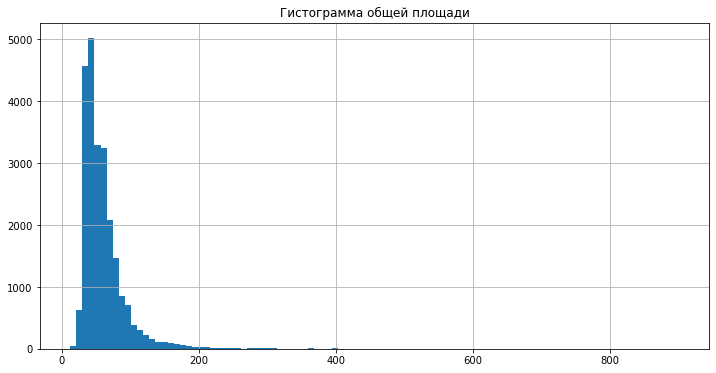

In [34]:
# построим гистограмму для площади, разбив диапазон на 100 корзин
build_hist(data, 'total_area', 'Гистограмма общей площади');

По гистограмме видно что подавляющее больштнство квартир в объявлениях по площади находятся в диапазоне примерно от 10 до 300 квадратных метров. Выведем гистограмму от 10 до 350 квадратных метров.

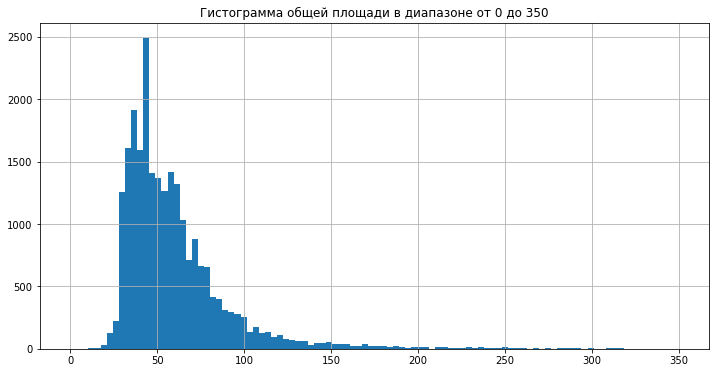

In [35]:
build_hist(data, 'total_area', 'Гистограмма общей площади', range=(0, 350));

Основное число квартир в объявлениях находятся в диапазоне от 25 до 100 квадратных метров.

* Построим гистограммы для цены

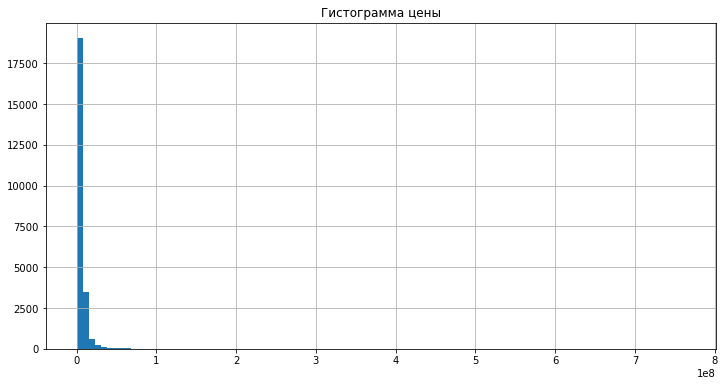

In [36]:
# построим гистограмму для цены, разбив диапазон на 100 корзин
build_hist(data, 'last_price', 'Гистограмма цены');

По гистограмме видно что подавляющее больштнство квартир по цене до 50000000. Выведем гистограмму от 0 до 50000000.

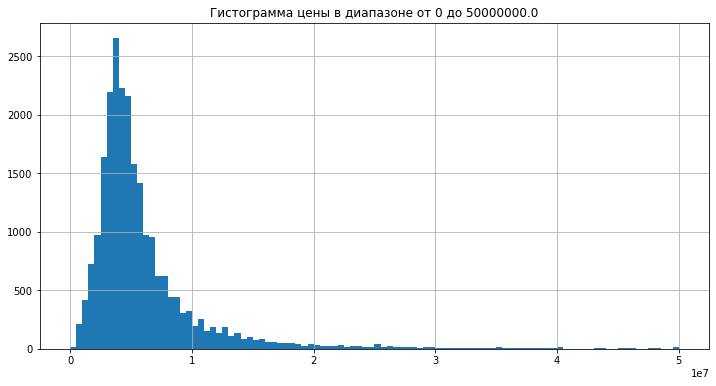

In [37]:
build_hist(data, 'last_price', 'Гистограмма цены', range=(0, 50e6));

Основное число квартир стоят в районе 5000000.

* Построим гистограммы для числа комнат

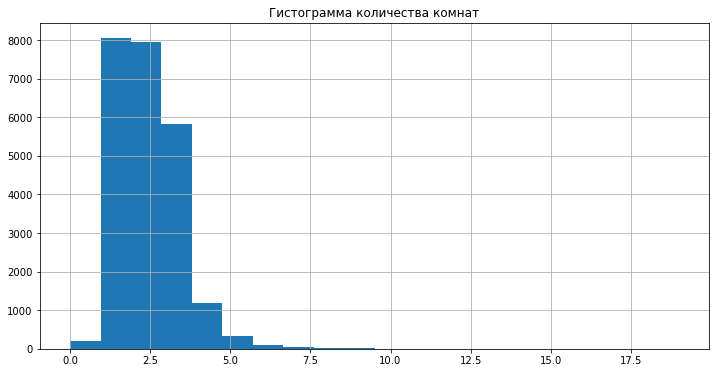

In [38]:
build_hist(data, 'rooms', 'Гистограмма количества комнат', bins=20);

В основном продаются квартиры с количеством комнат от 1 до 3.

* Построим гистограммы для высоты потолков

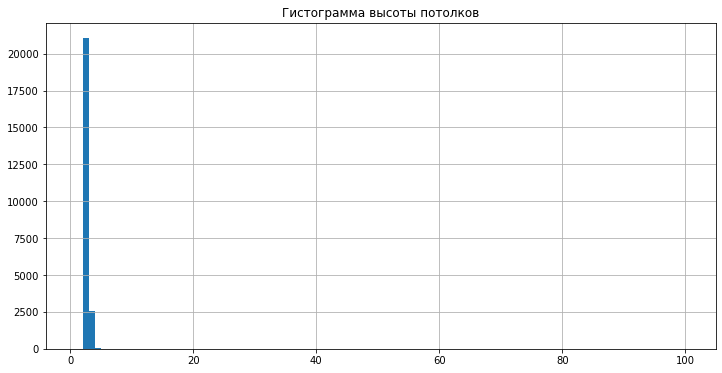

In [39]:
build_hist(data, 'ceiling_height', 'Гистограмма высоты потолков');

По данному параметру выбросы доходят аж до 100м. Маловероятны квартиры с такой высотой потолка. Возьмём диапазон в который впишутся более реальные значения - от 1 до 5 метров.

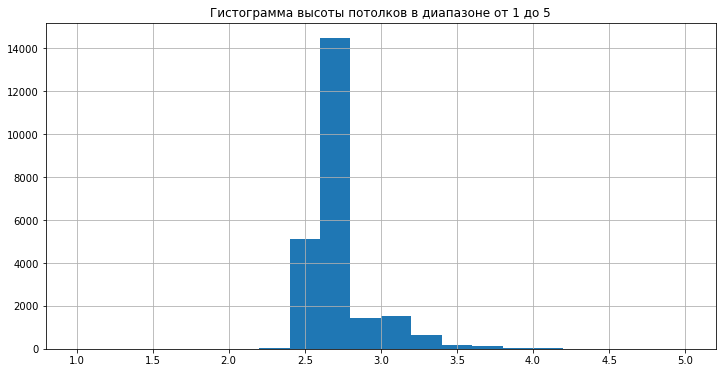

In [40]:
build_hist(data, 'ceiling_height', 'Гистограмма высоты потолков', range=(1, 5), bins=20);

Основной разброс значений получается от 2,5 до 3 метров.

### Вывод

После изучения площади, цены, числа комнат, высоты потолков можно сделать вывод что основное число квартир в объявлениях находятся в диапазоне от 25 до 100 квадратных метров, большинство квартир стоят в районе 5 миллионов рублей, преобладают квартиры с количеством комнат от 2-х до 3-х, площадью от 25 до 100 квадратных метров и высотой потолков от 2,5 до 3 метров.

<a id='9-bullet'></a>
### 9. Изучение времени продажи квартиры.

Постороим гистограмму врремени продажи квартиры.

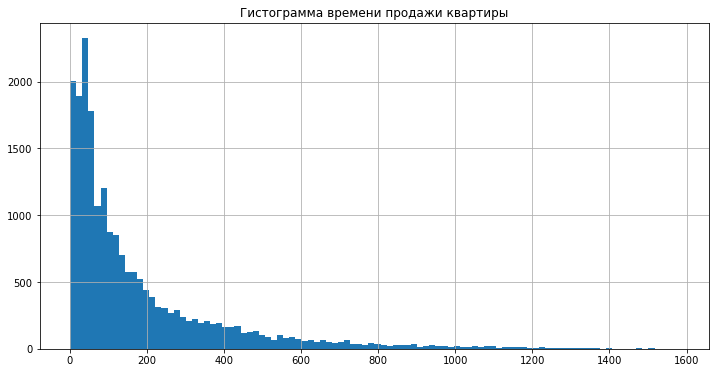

In [41]:
build_hist(data, 'days_exposition', 'Гистограмма времени продажи квартиры');

Большинство значений находятся от 0 до 600 дней, больше 1000 дней продаж значений гораздо меньше, а после 1200 график сливается с нулём, то есть так долго квартиры продаются очень редко. Посмотрим гистограмму на периоде от 0 до 1000 дней.

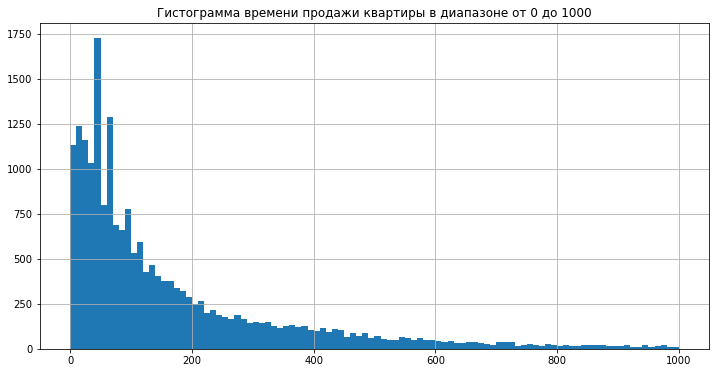

In [42]:
build_hist(data, 'days_exposition', 'Гистограмма времени продажи квартиры', range=(0, 1000));

Есть всплески на каких-то определённых значениях. Посмотрим среднюю, медиану, минимальное и максимальное значения с помощью метода describe()

In [43]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение получилось 181 день, а медиана 95 дней. Стандартное отклонение 220 это много, а значит разброс значений большой.
Для наглядности построим диаграмму размаха.

In [44]:
def build_boxplot(df, col, title='', figsize=(12, 6), ylim=()):
    df.boxplot(col, figsize=figsize)
    if title == '':
        title = 'Диаграмма размаха для {}'.format(col) 
    if len(ylim) == 2:
        plt.ylim(ylim[0], ylim[1])
        title = '{} в пределах от {} до {}'.format(title, ylim[0], ylim[1])
    plt.title(title)

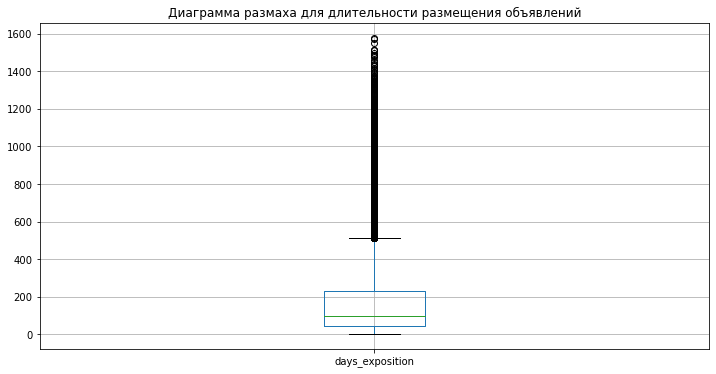

In [45]:
build_boxplot(data, 'days_exposition', 'Диаграмма размаха для длительности размещения объявлений')

Видно что верхний ус находится в районе 500. Ограничим диаграмму от -50 до 600.

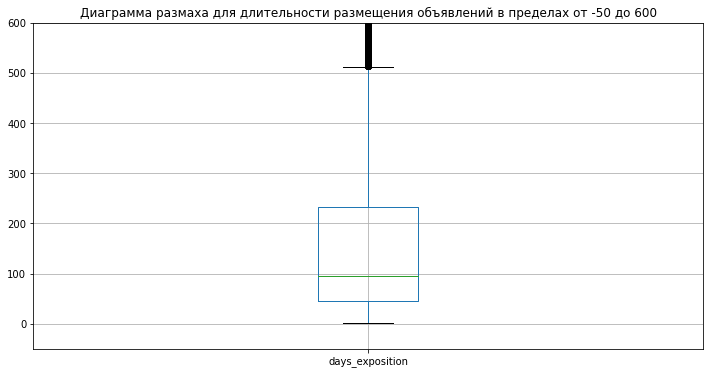

In [46]:
build_boxplot(data, 'days_exposition', 'Диаграмма размаха для длительности размещения объявлений', ylim=(-50, 600))

Получается, **обычно продажи занимают от 45 до 230 дней**. Далее идёт длинный хвост из значений, кторый уже уходит далеко от средней и медианы.
Посмотрим какой процент объявлений о продаже висело больше 600 дней.

In [47]:
print(data.query('days_exposition > 600')['days_exposition'].count() / data['days_exposition'].count()) 

0.05838775709133444


Всего 6%. Значит будеи считать **время продажи больше 600 дней аномально долгой продажей**.

Чтобы понять что считать очень быстрой продажей, посмотрим какой процент квартир продавалось быстрее чем за 10 дней.

In [48]:
print(data.query('days_exposition < 10')['days_exposition'].count() / data['days_exposition'].count()) 

0.05507359391753582


Те же самые 6%. Будем считать **время продажи меньше 10 дней - очень быстрой продажей**.

### Вывод

Обычно продажи занимают от 45 до до 230 дней. В этом диапазоне есть всплески на, которые как мне кажется, связаны с автоматическим закрытием объявлений если их не подтверждают. Учитывая стандартное отклонение, которое очень большое, можно сделать выводы что разброс в данных по времени продажи очень велик, но всё же можно выделить области с очень быстрым временем продажи - меньше 10 дней и аномально долгим временем продажи - более 600 дней. Думаю эти акномалии связаны с занижением или завышением цены относительно средней рыночной.

<a id='10-bullet'></a>
### 10. Исключение редких и выбивающихся значений.

Для определения редких и выбивающихся значений, построим гистограммы столбцов, которые нам будут нужны для анализа.

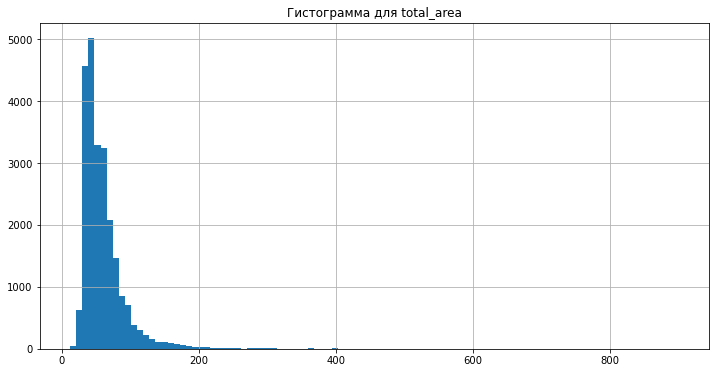

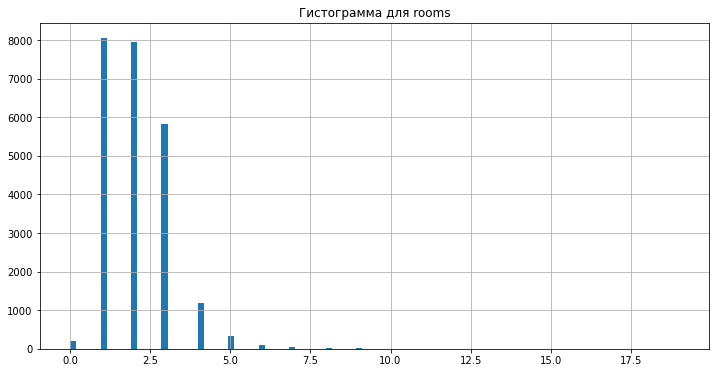

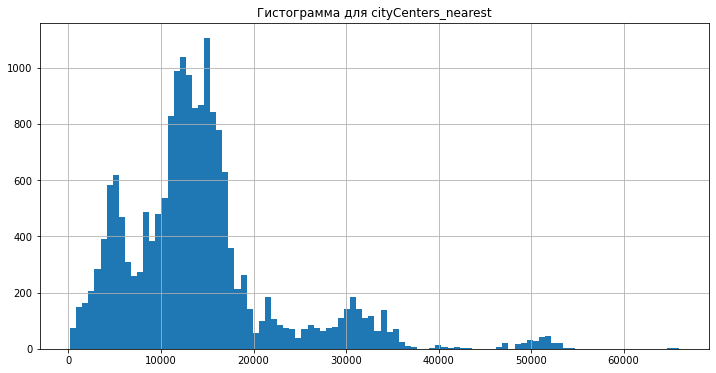

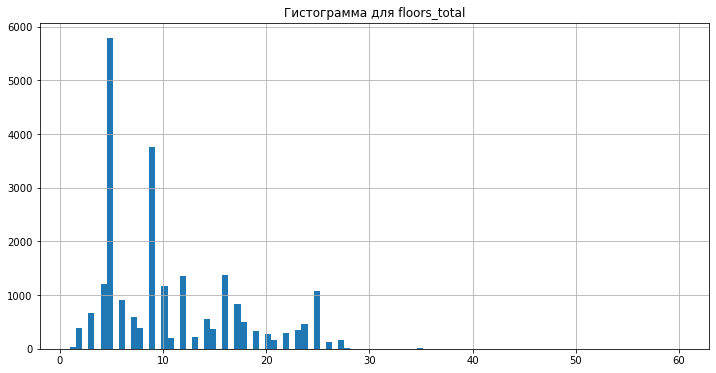

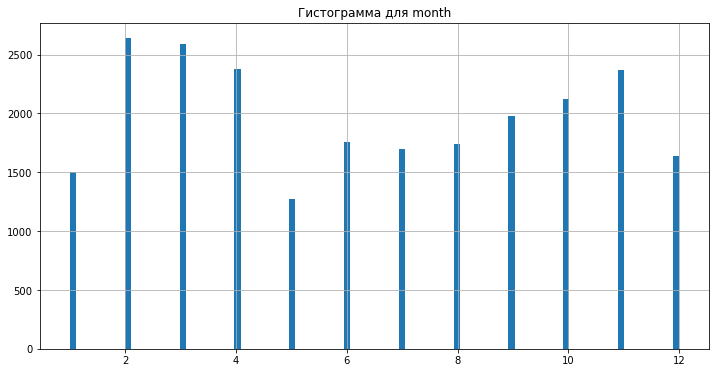

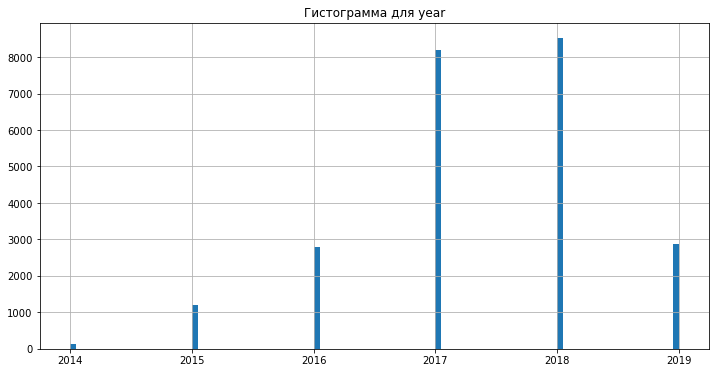

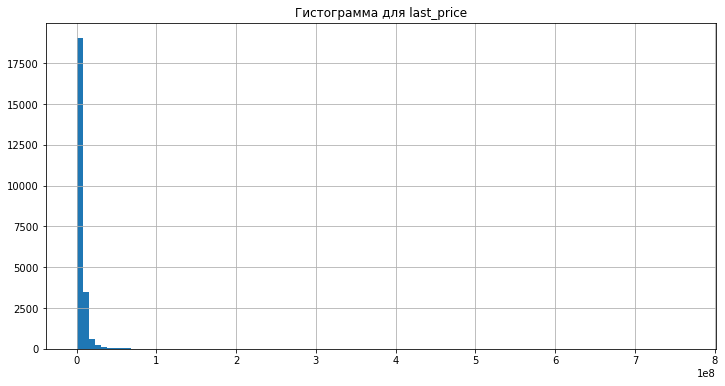

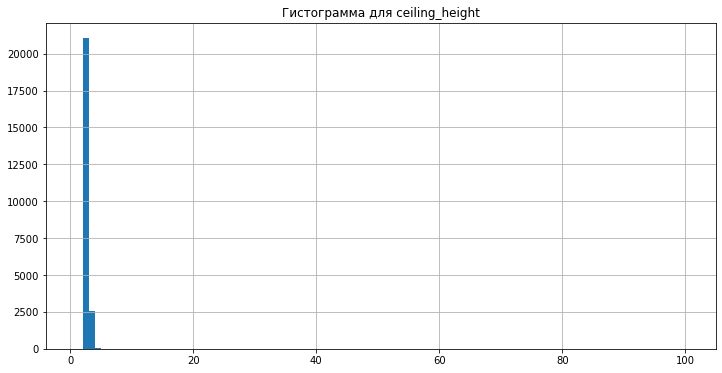

In [49]:
for column in ['total_area', 'rooms', 'cityCenters_nearest', 
               'floors_total', 'month', 'year', 'last_price', 'ceiling_height']:
    build_hist(data, column)
    plt.show()

Думаю следует разобраться с аномальными значениями в колонках *total_area*, *rooms*, *last_price* и *ceiling_height*.

На гистограмме "общая площадь" видно что после 100 квадратных метров график быстро уходит вниз и после 200 практически сливается с нулём.
Построим диаграмму размаха для общей площади на диапазоне от 0 до 200

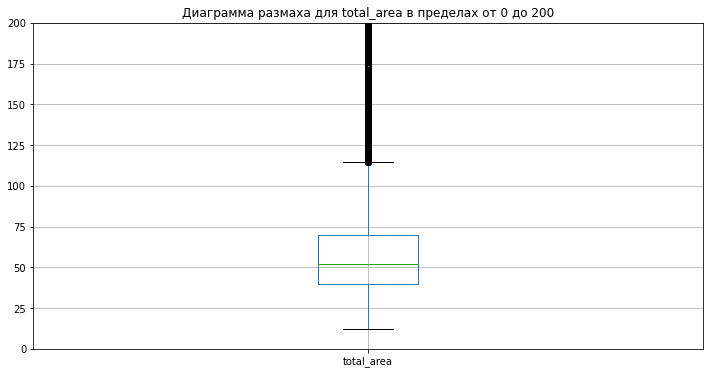

In [50]:
build_boxplot(data, 'total_area', ylim=(0, 200))

Диаграмма размаха показывает что нормальные значения расположены от примерно 10 до примерно 125. Оба графика подтверждают друг друга. Думаю нужно исключить варианты с площадью меньше 20 и больше 125. Будем считать такую площадь аномальной или редко встречающейся. Проверим какова доля таких вариантов от общего числа.

In [51]:
print(data.query('(20 > total_area) or (total_area > 125)')['total_area'].count() / data['total_area'].count())

0.040887801173045274


Около 4% - это мало. К тому же, наверняка, ценообразование для квартир такой площади строится уже по другому, да и спрос на них тоже. Лучше убрать такие варианты.

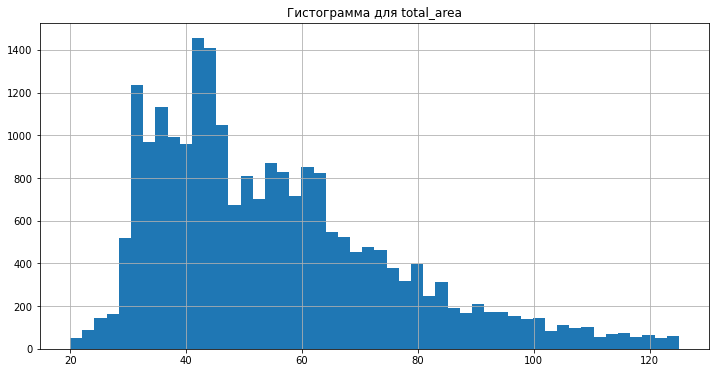

In [52]:
data = data.query('20 <= total_area <= 125')

build_hist(data, 'total_area', bins=50)

По гистограмме "количество комнат" значения больше 5 встречаются очень редко. Построим гистограмму в пределах от 0 до 5 комнат.

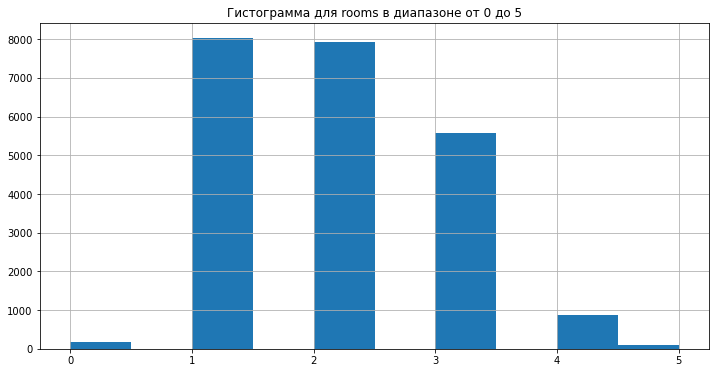

In [53]:
build_hist(data, 'rooms', bins=10, range=(0, 5))

В основном квартиры 1, 2, 3 и 4-х комнатные. Мы уже знаем что 0 комнат имеют только студии. Но их мало, как и 5-комнатных. Нужно проверить какая часть квартир находится за пределами диапазона от 1 до 4 комнат.

In [54]:
print(data.query('(0 > rooms) or (rooms > 4)')['rooms'].count() / data['rooms'].count())

0.005411350637923449


Пол процента - очень мало. Думаю можно исключить эти варианты.

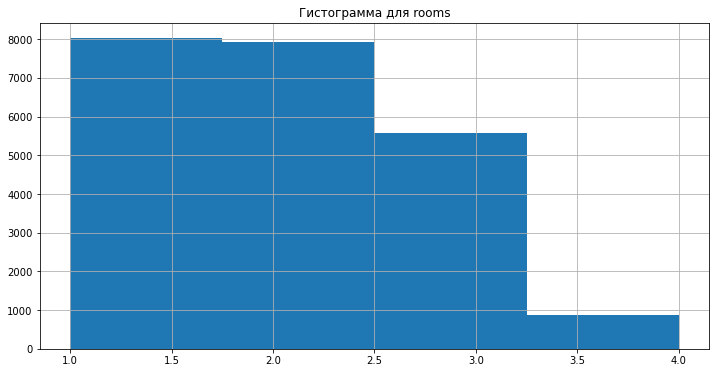

In [55]:
data = data.query('1 <= rooms <= 4')

# посмотрим новую гистограмму
build_hist(data, 'rooms', bins=4)

Теперь рассмотрим гистограмму цены в диапазоне от 0 до 10000000.

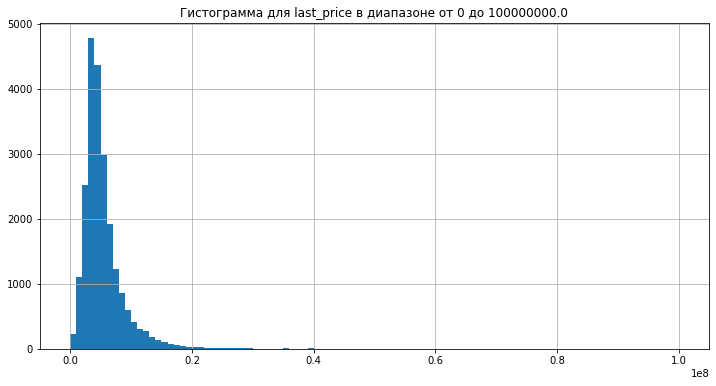

In [56]:
build_hist(data, 'last_price', range=(0, 1e8))

Выше 20 миллионов количество цен мизерное. Посмотрим какая часть цен выше этого значения.

In [57]:
print(data.query('last_price > 20e6')['last_price'].count() / data['last_price'].count())

0.00923323966278603


Около 0,9% цен выходят за эту границу. не думаю что стоит убирать цены ниже, так как в центре квартиры могут быть очень дорогими и мы сильно исказим статистику. Уберём всё что выше 20 миллионов.

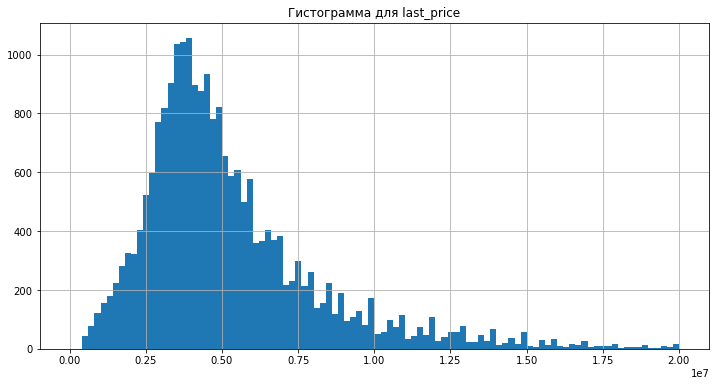

In [58]:
data = data.query('last_price <= 20e6')

# посмотрим новую гистограмму
build_hist(data, 'last_price')

По гистограмме видно что есть очень маленькие цены. Неправдоподобно маленькие. Думаю стоит исключить цены меньше 1 миллиона. Это либо очень плохое жильё, либо аномалия. Посмотрим какая часть квартир в диапазоне до 1 миллиона.

In [59]:
print(data.query('last_price < 1e6')['last_price'].count() / data['last_price'].count())

0.010039618224383217


Тот же самый 1%. Исключим их.

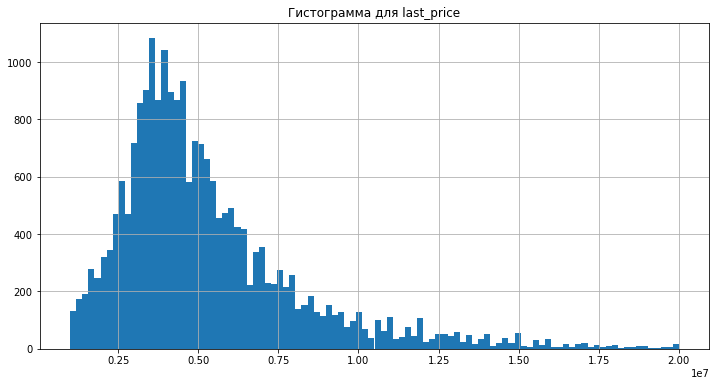

In [60]:
data = data.query('last_price >= 1e6')

# посмотрим новую гистограмму
build_hist(data, 'last_price')

Чтобы что-то разглядеть на гистограмме высоты потолков сузим её от 2 до 5.

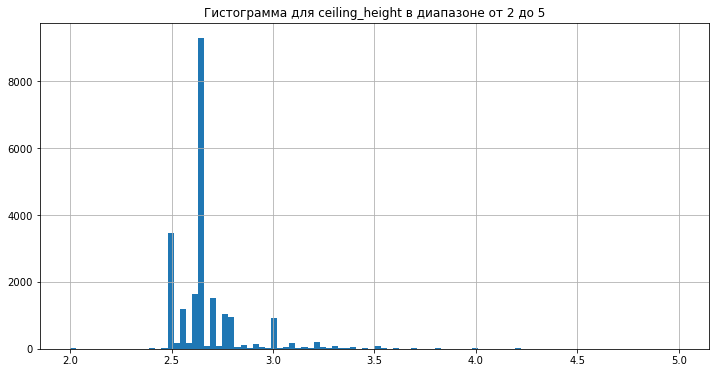

In [61]:
build_hist(data, 'ceiling_height', range=(2, 5))

Думаю можно оставить потолки от 2,4 до 4 метров. Остальные варианты маловероятны и их просто крайне мало.

In [62]:
data = data.query('2.4 <= ceiling_height <= 4')

В итоге мы избавивились в данных, которые требуют дальнейшего анализа, от сильно отличающихся редких значений. Посмотрим от какой процент данных оказалось потеряным после этих операций. К нам в руки база попала состоящая из 23699 записей. Посмотрим сколько осталось теперь и высчитаем процент потерянных данных.

In [63]:
print('Осталось записей', data.shape[0])
print('Потеряно {:.2%} записей'.format((23699 - data.shape[0]) / 23699))

Осталось записей 21915
Потеряно 7.53% записей


Ну не так уж и много. Тем более большинство мы потеряли, когда отсеивали большую и мизерную площадь. Такие варианты сильно бы исказили цену квартир в центре например, если она очень маленькая или хоромы на окраине. 

### Вывод

В результате избавления от редких и выбивающихся значений в различных столбцах мы привели данные в рамки разумного, исключили какие-то фейки или эксклюзивные варианты квартир, которые могли вносить искажение в реальное положение дел. В результате этих манипуляций мы потеряли около 7,5% данных.

<a id='11-bullet'></a>
### 11. Определение факторов больше всего влияют на стоимость квартиры.

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого выведем для каждого параметра диаграмму рассеяния и определим коэффициент корреляции.

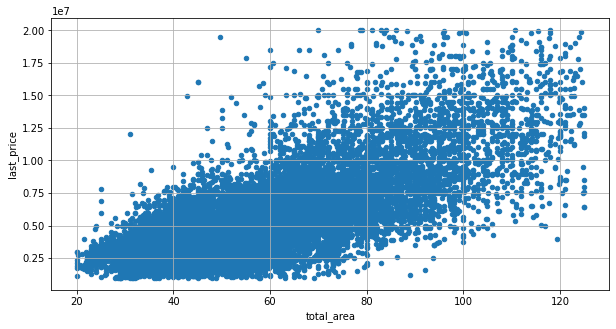

Коэффициент корреляции цены и total_area: 0.74


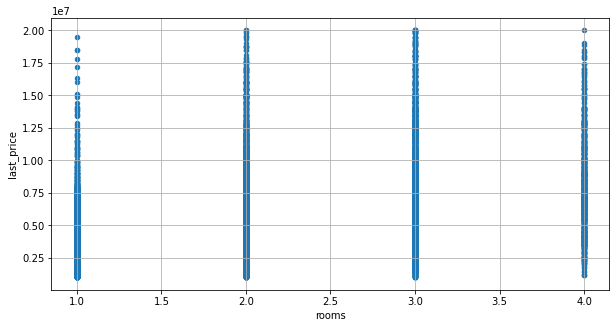

Коэффициент корреляции цены и rooms: 0.44


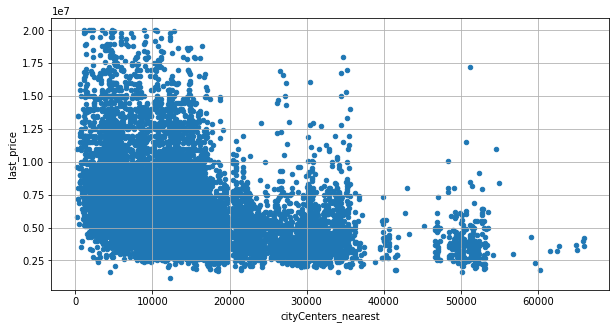

Коэффициент корреляции цены и cityCenters_nearest: -0.35


In [64]:
for column in ['total_area', 'rooms', 'cityCenters_nearest']:
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(10, 5))
    plt.show()
    print('Коэффициент корреляции цены и {}: {:.2f}'
          .format(column, data['last_price'].corr(data[column])))

Максимальная зависимость цены от общей площади квартиры. От количества комнат зависимость меньше. Удалённость от центра имеет обратную зависимость в цене, но наименее выраженную. Хотя на графике видно, что максимальные цены находятся в пределах 20 километров от центра. Можно сделать вывод что общая площадь важнее чем близость к центру, но мне кажется, это только на всём диапазоне.

Проверим на сколько зависит цена от этажа на котором находится квартира. Для этого найдём средние и медианные значения цен для квартир на разных уровнях: первый этаж, поледний этаж и другие. Сделаем это с помощью сводной таблицы? которую сразу отсортируем

In [65]:
display(data
        .pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median'])
        .sort_values(('mean', 'last_price')))

,mean,median
,last_price,last_price
floor_category,,
первый,4.338341e+06,3900000
последний,4.955482e+06,4200000
другой,5.507799e+06,4700000


Оба параметра очень хорошо показывают, что стоимость квартир на первом этаже минимальная, на последнем чуть дороже, а любой другой этаж в среднем стоит значительно дороже.

Посмотрим зависимость цены от дня недели, месяца и года в котором было подано объявление. Сгруппируем данные по средней и медианной цене, и выведем на графики все эти параметры.

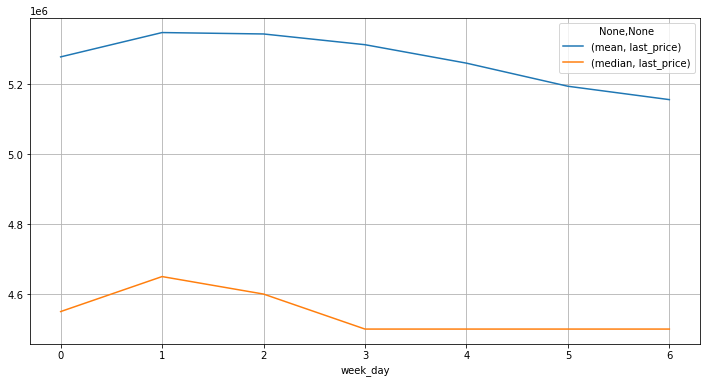

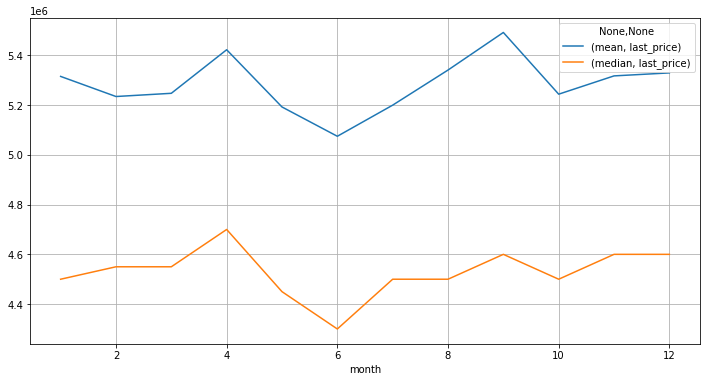

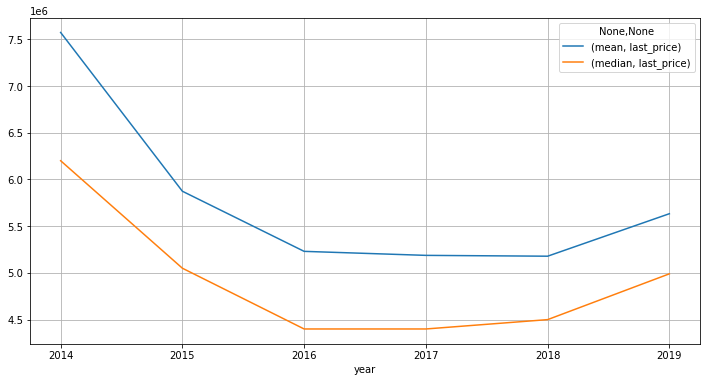

In [66]:
for column in ['week_day', 'month', 'year']:
    (
        data
        .pivot_table(index=column, values='last_price', aggfunc=['mean', 'median'])
        .plot(figsize=(12, 6), grid=True)
    )

Графики красноречивы. Из результатов видно, что по дням недели сильного различия нету, но всё же от начала недели к концу квартиры хоть немного, но дешевеют, по месецам разброс тоже не значительный, пики цены в апреле и сенятбре, а спад в июне. А вот по годам видно что квартиры в среднем дешевели начиная с 2014 года, при чём сильно подешевели с 2014 по 2016, потом цена стабилизировалась и в 2018 - 1019 году начался подъём цен.

### Вывод

По результатам исследования более всего цена квартиры всё же зависит от площади квартиры, в меньшей степени от количества комнат, что говорит о том что болшее количество комнат не всегда означает большую площадь. Меньше всего цена зависит от удалённости от центра, но по диаграмме рассеивания видно что всё же потолок цен от центра к окраинам понижается и количество дорогих квартир уменьшается.

Так же есть хорошо выраженная зависимость стоимости квартиры от этажа. Так самые дешёвые квартиры находятся на первом этаже, потом последний этаж и выше всего ценятся квартиры не на первом и не на последнем этаже.

Интересным выглядит зависимость средней цены от дня недели размещения объявления - в начале недели продавцы склонны завышать стоимость. На графике средней цены по годам вдны этапы снижения и начала роста рынка недвижимости - с 2014 года он падал вплоть до 2018, когда цены на жильё начали рост.

<a id='12-bullet'></a>
### 12. Определение населённых пунктов с наибольшим числом объявлений.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Создадим для этого переменную *top_locality* в котором будет находится один столбец с топ 10 населённых пунктов по количеству объявлений.

In [71]:
top_locality = pd.DataFrame({'locality_name':data['locality_name'].value_counts().head(10).index})

# выведем результат на экран
print(top_locality)

       locality_name
0    Санкт-Петербург
1     посёлок Мурино
2     посёлок Шушары
3         Всеволожск
4             Пушкин
5            Колпино
6  посёлок Парголово
7            Гатчина
8    деревня Кудрово
9             Выборг


Обяеденим с основной таблицей так, чтобы остались только топовые населённые пункты.

In [68]:
top_locality = top_locality.merge(data, on='locality_name', how='left')

# посмотрим какие населённые пункты остались и их количество
print(top_locality['locality_name'].value_counts())

Санкт-Петербург      14377
посёлок Мурино         492
посёлок Шушары         433
Всеволожск             386
Пушкин                 346
Колпино                335
посёлок Парголово      322
Гатчина                302
деревня Кудрово        283
Выборг                 224
Name: locality_name, dtype: int64


Посчитаем среднюю цену в выбранных населённых пунктах.

Сначала создадим колонку с ценой за квадратный метр.

In [69]:
top_locality['square_meter_price'] = (top_locality['last_price'] / top_locality['total_area']).astype('int')

# выведем результат
display(top_locality[['total_area', 'last_price', 'square_meter_price']].head())

,total_area,last_price,square_meter_price
0,108.0,13000000,120370
1,56.0,5196000,92785
2,100.0,10000000,100000
3,71.6,7915000,110544
4,61.0,5400000,88524


Посчитаем среднюю цену в этих населённых пунктах. Воспользуемся сводной таблицей. сохраним результат в **average_price**. Отсортируем сразу по средней цене и выведем результат в виде таблицы и столбчатого графика.

,square_meter_price
locality_name,
Выборг,58918.825893
Всеволожск,67227.458549
Гатчина,69123.400662
Колпино,75420.301493
посёлок Шушары,78426.242494
посёлок Мурино,85159.861789
посёлок Парголово,90448.000000
деревня Кудрово,92296.749117
Пушкин,101846.459538


<AxesSubplot:xlabel='locality_name'>

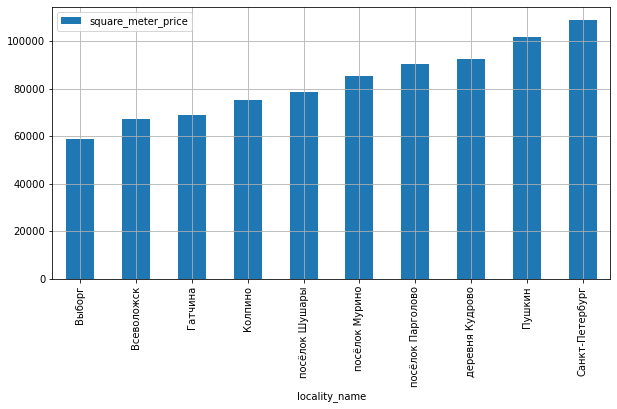

In [70]:
average_price = (top_locality
                 .pivot_table(index='locality_name', values='square_meter_price')
                 .sort_values('square_meter_price')
                )
# выведем результат в виде таблицы
display(average_price)

# и столбчатого графика
average_price.plot(y='square_meter_price', kind='bar', figsize=(10, 5), grid=True)


Получившийся результат наглядно показывает в каких из этих населённых пунктов жильё дороже, а где дешевле.
В Выборге самое дешёвое жильё, а в Пушкин и Санкт-Петербурге, что ожидаемо - самое дорогое. Между самым дешёвым и самым дорогим населённым пунктом разница почти в 2 раза.

<a id='13-bullet'></a>
### 13. Изучение предложения квартир.

Выделим объявления для Санкт-Петербурга и сохраним их в переменную **petersburg_data**

In [71]:
petersburg_data = data.query('locality_name == "Санкт-Петербург"').copy()

# посмотрим на первые 10 строк
display(petersburg_data[['locality_name', 'cityCenters_nearest']].head(10))

,locality_name,cityCenters_nearest
0,Санкт-Петербург,16028.0
2,Санкт-Петербург,13933.0
4,Санкт-Петербург,8098.0
7,Санкт-Петербург,11634.0
9,Санкт-Петербург,15008.0
10,Санкт-Петербург,13878.0
15,Санкт-Петербург,14259.0
16,Санкт-Петербург,10698.0
17,Санкт-Петербург,14616.0
18,Санкт-Петербург,10842.0


Создадим столбец с расстоянием до центра в километрах **cityCenters_nearest_km**.

In [72]:
# избавимся от пропусков в колонке cityCenters_nearest
petersburg_data.dropna(subset=['cityCenters_nearest'], inplace=True)

# создадим столбец с расстоянием в километрах, сразу изменив тип на int
petersburg_data['cityCenters_nearest_km'] = (petersburg_data['cityCenters_nearest'] / 1000).round().astype('int')

# посмотрим на первые 10 строк
display(petersburg_data[['locality_name', 'cityCenters_nearest', 'cityCenters_nearest_km']].head(10))

,locality_name,cityCenters_nearest,cityCenters_nearest_km
0,Санкт-Петербург,16028.0,16
2,Санкт-Петербург,13933.0,14
4,Санкт-Петербург,8098.0,8
7,Санкт-Петербург,11634.0,12
9,Санкт-Петербург,15008.0,15
10,Санкт-Петербург,13878.0,14
15,Санкт-Петербург,14259.0,14
16,Санкт-Петербург,10698.0,11
17,Санкт-Петербург,14616.0,15
18,Санкт-Петербург,10842.0,11


Сделаем сводную таблицу средней цены по расстоянию в километрах, отсортируем её по убыванию и построим график, чтобы определить сегмент квартир в центре.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

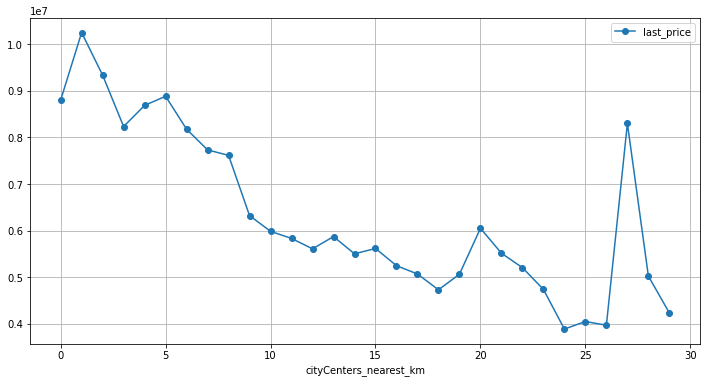

In [73]:
(petersburg_data
 .pivot_table(index='cityCenters_nearest_km', values='last_price')
 .plot(grid=True, figsize=(12, 6), style='o-')
)

### Вывод

До 8 км. график снижается равномерно, затем резкое падение. Думаю до 8 километра включительно можно считать центром города. Есть всплески на 20 и 27 км. Думаю это может означать что в этом радиусе находится либо парк, либо набережная, либо элитный комплекс.

<a id='14-bullet'></a>
### 14. Изучение сегмента квартир в центре.

Проанализируем центр Санкт-Петербурга. Для этого выделим из таблицы *petersburg_data* часть квартир в центре, которые находятся в радиусе 8 км от центра. Сохраним в *petersburg_center_data*.

In [74]:
petersburg_center_data = petersburg_data.query('cityCenters_nearest_km <= 8').copy()

# выведем первые 10 строк
display(petersburg_center_data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day,month,year,floor_category,living_to_total_area_ratio,kitchen_to_total_area_ratio,cityCenters_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
24,8,6500000,97.2,2015-10-31,2,2.65,3.0,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265.0,66872,5,10,2015,первый,0.478395,0.201646,2
61,18,7990000,74.0,2017-08-24,2,2.65,4.0,43.0,4,False,False,False,20.0,0,Санкт-Петербург,22568.0,4288.0,1,363.0,0,NaN,609.0,107972,3,8,2017,последний,0.581081,0.270270,4
63,2,20000000,118.0,2018-09-11,3,3.00,9.0,68.0,7,False,False,False,16.0,0,Санкт-Петербург,26055.0,4800.0,1,648.0,1,779.0,37.0,169491,1,9,2018,другой,0.576271,0.135593,5
70,9,3400000,30.0,2018-09-05,1,2.65,5.0,16.0,1,False,False,False,7.0,0,Санкт-Петербург,39053.0,8313.0,1,382.0,0,NaN,14.0,113333,2,9,2018,первый,0.533333,0.233333,8
94,3,3500000,29.5,2019-04-26,1,2.50,5.0,15.6,2,False,False,False,5.5,1,Санкт-Петербург,12921.0,7303.0,0,NaN,0,NaN,4.0,118644,4,4,2019,другой,0.528814,0.186441,7
99,32,9600000,90.0,2017-09-26,4,2.65,5.0,67.0,2,False,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,NaN,0,NaN,104.0,106666,1,9,2017,другой,0.744444,0.088889,3
111,4,4590000,40.0,2017-05-29,1,2.65,6.0,18.0,1,False,False,False,10.0,0,Санкт-Петербург,20062.0,6175.0,1,241.0,0,NaN,31.0,114750,0,5,2017,первый,0.450000,0.250000,6
114,5,4000000,21.4,2019-02-07,1,2.90,8.0,8.3,7,False,False,False,6.3,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN,186915,3,2,2019,другой,0.387850,0.294393,6
136,16,6500000,51.8,2018-08-01,2,3.45,6.0,25.6,2,False,False,False,7.3,1,Санкт-Петербург,20502.0,3618.0,2,533.0,1,812.0,163.0,125482,2,8,2018,другой,0.494208,0.140927,4


Посмотрим какие квартиры там преобладают по площади, числу комнат и высоте потолков.

Создадим словарь *parameters*.

In [75]:
parameters = {'total_area': 'Площадь', 'rooms': 'Количество комнат', 'ceiling_height': 'Высота потолков'}

Посмотрим гистограммы этих значений для центра.

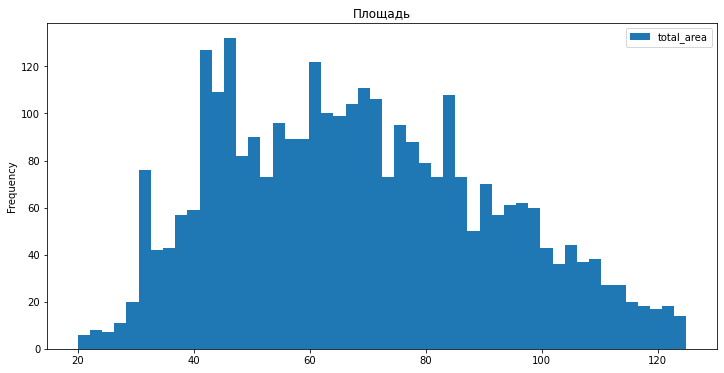

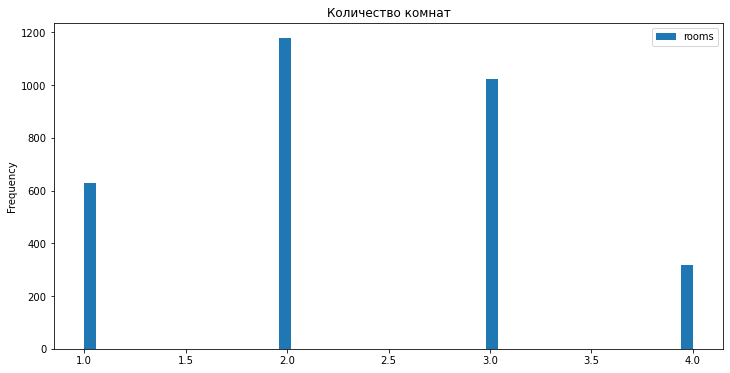

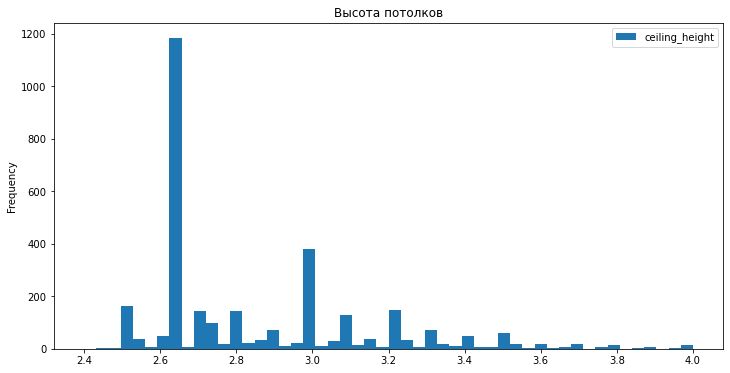

In [76]:
for column, name in parameters.items():
    petersburg_center_data.plot(y=column, title=name, kind='hist', bins=50, figsize=(12, 6))

На первый взгляд видно, что преобладают 2 - 3  комнатные квартиры с площадью в районе 40 - 70 квадратных метров и высотой потолков около 2,6 метров.
Для большей наглядности выведем дщиаграммы рассеивания этих параметров.

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='rooms', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='ceiling_height'>]],
      dtype=object)

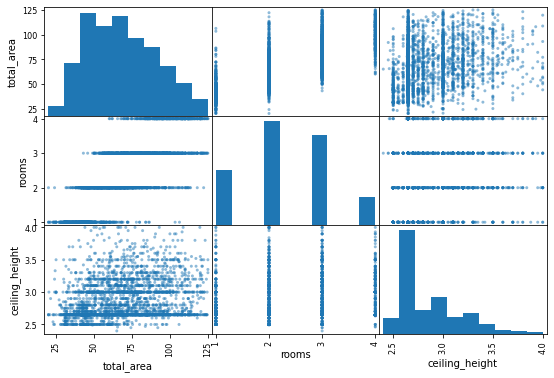

In [77]:
pd.plotting.scatter_matrix(petersburg_center_data[parameters], figsize=(9, 6))

По данным диаграммам можно увидеть только зависимость количества комнат от площади и разглядеть что квартиры с высокими потолками чаще встречаются в квартирах с большей площадью. Попробуем уточнить эти зависимости с помощью графиков, поделённых на шестиугольники.

Площадь и количество комнат.

<AxesSubplot:xlabel='total_area', ylabel='rooms'>

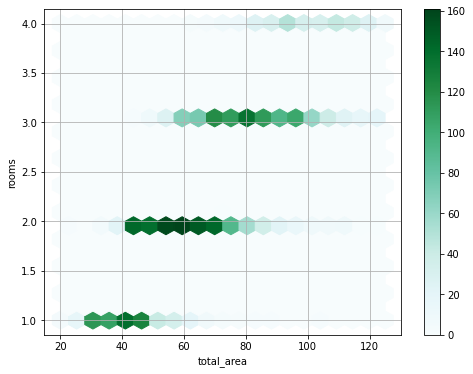

In [78]:
petersburg_center_data.plot(x='total_area', y='rooms', kind='hexbin', 
                            gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Видно что чаще всего встречаются 2 комнатные квартиры с площадью от 50 до 70 квадратных метров. У трёхкомнатных разброс площадей больше, но в основном в районе 80 квадратных метров.

Площадь и высота потолков.

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

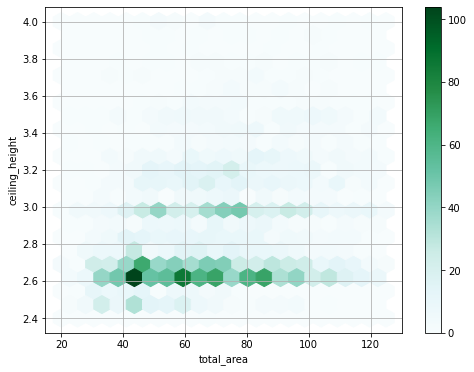

In [79]:
petersburg_center_data.plot(x='total_area', y='ceiling_height', kind='hexbin', 
                            gridsize=20, figsize=(8, 6), sharex=False, grid=True)

С потолками всё не так очевидно. Но заметно, что хоть преобладает вариант квартир с площадью чуть больше 40 квадратных метров и высотой потолков в районе 2.6 метров, но видно что 3-х метровые потолки наиболее часто встречаются в квартирах с площадью от 70 до 80 квадратных метров.

Исследуем зависимость цены квартиры в центре от удалённости, числа комнат, категории этажа и даты размещения объявления.

Исследуем зависимость цены квартиры в центре от удалённости от него, для этого построим диаграмму рассеивания и коэффициент корреляции и проанализируем их.

Коэффициент корреляции цены и удалённости от центра: -0.16


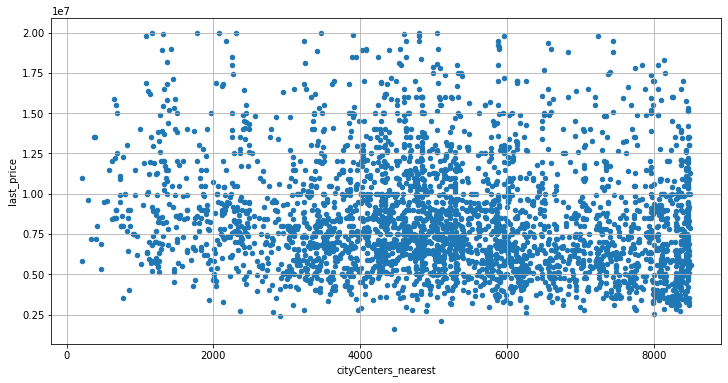

In [80]:
    petersburg_center_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(12, 6))
    print('Коэффициент корреляции цены и удалённости от центра: {:.2f}'
          .format(petersburg_center_data['last_price'].corr(petersburg_center_data['cityCenters_nearest'])))

Зависимость очень слабая обратная, гораздо слабее чем у всей выборки.

Проверим на сколько зависит цена от этажа на котором находится квартира. Для этого найдём средние значения цен для квартир на разных уровнях: первый этаж, поледний этаж и другие. Сделаем это с помощью сводной таблицы,которую сразу отсортируем.

In [81]:
display(petersburg_center_data
        .pivot_table(index='floor_category', values='last_price')
        .sort_values('last_price').astype('int'))

,last_price
floor_category,
первый,6596499
последний,8475873
другой,8749582


Тут самым дешёвым, как и по всей выборке, оказался первый этаж. Но вот последний и остальные этажи в среднем стоят практически одинаково. Видимо это потом что в центре этажность у домов меньше чем на окраине.

Для выяснения зависимости цены от числа комнат, так же воспользуемся сводной таблицей, но выведем её на график.

<AxesSubplot:xlabel='rooms'>

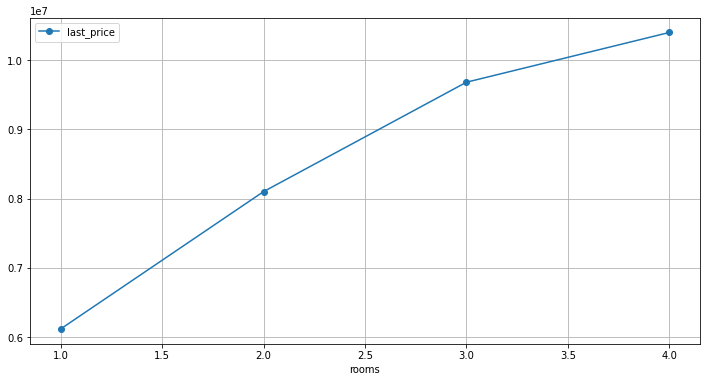

In [82]:
(petersburg_center_data
        .pivot_table(index='rooms', values='last_price')
        .plot(grid=True, figsize=(12, 6), style='o-')
)

Ожидаемо, что стоимость квартир в среднем растёт от количества комнат, как и во всей выборке.

Для понимания зависимости стоимости квартиры от даты размещения объявления, сгруппируем все данные по году публикации, отсортируем их по нему и выведем в виде графика зависимости средней цены от года размещения.

<AxesSubplot:xlabel='year'>

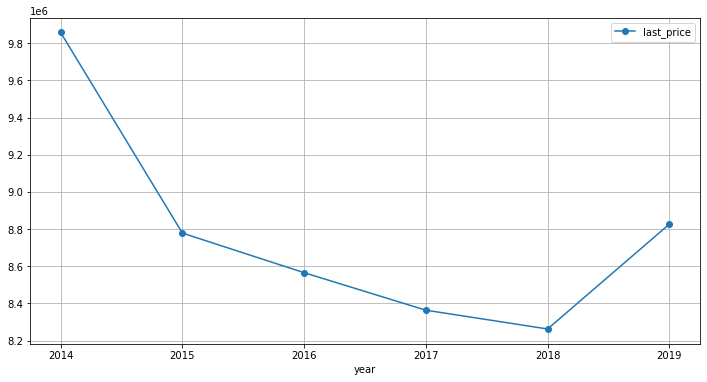

In [83]:
(petersburg_center_data
        .pivot_table(index='year', values='last_price')
        .plot(grid=True, figsize=(12, 6), style='o-')
)

Картина практически не отличается от общей, единственное, если на общих данных цена в 2018 году пошла вверх, то здесь она продолжила падать и развернулась только в 2019 году.

### Вывод

По результатам исследования в центре культурной столицы чаще всего встречаются 2 комнатные квартиры с площадью от 50 до 70 квадратных метров. У трёхкомнатных разброс площадей больше, но в основном в районе от 70 до 90 квадратных метров. В основном высота потолко колеблется в районе 2.6 метров, 3-х метровые же потолки наиболее часто встречаются в квартирах с площадью от 70 до 80 квадратных метров.

Что же касается зависимости стоимости квартир от различных параметров, то цена очень слабо зависит от удалённости от центра, гораздо слабее чем у всей выборки, средняя цена в зависимости от количества комнат растёт, как и во всей выборке, сильно от общих данных не отличается зависимость цен на квартиры по годам, единственное, если на общих данных цена в 2018 году пошла вверх, то здесь она продолжила падать и развернулась только в 2019 году.

<a id='15-bullet'></a>
### Шаг 5. Общий вывод

По результатам исследования архива объявлений на продажу квартир в Санкт-Петербурге можно сделать выводы:

 * основное число квартир в объявлениях находятся в диапазоне от 25 до 100 квадратных метров, большинство квартир стоят в районе 5 миллионов рублей, преобладают квартиры с количеством комнат от 2-х до 3-х, преобладает площадь от 25 до 100 квадратных метров, высота потолков же колеблется в основном от 2,5 до 3 метров 
 * обычно объявление о продаже находится на сайте от 45 до 230 дней
 
Был определён центр города в радиусе 8 километров, здесь преобладают 2 комнатные квартиры с площадью от 50 до 70 квадратных метров и высотой потолков около 2,6 метров.

По сравнению зависимости цены от различных параметров квартир в этом радиусе и по всему городу можно сделать следующие выводы:

* более всего цена квартиры как в центре города, так и по всей выборке зависит от площади квартиры и количества комнат. Первый этаж самый дешёвый как в центре так и во всём городе, а вот последний этаж в центре не сильно отличается по стоимости чем все остальные этажи, хотя по всему городу последний этаж сильно дешевле чем другие, но дороже первого
* в центре города удалённость от центра практически не сказывается на стоимости квартиры, а в данных по всему городу обратная зависимость прослеживается больше и видно что количество дорогих квартир к окраине идёт на убыль